In [10]:
from sklearn.model_selection import KFold
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import seaborn as sns

In [3]:
datos = pd.read_csv('svm.csv')
df = pd.DataFrame(datos)

In [9]:
X1 = df['X1']
X2 = df['X2']

kf = KFold(n_splits=10)

i = 1
for valx,valy in kf.split(X1):
    df.iloc[valx].to_csv('train'+str(i)+".csv",index=False)
    df.iloc[valy].to_csv('test'+str(i)+".csv",index=False)
    i=i+1
#     print(valx,valy)
#     print("Entrenamiento:\n",df.iloc[valx])
#     print("Prueba:\n",df.iloc[valy])


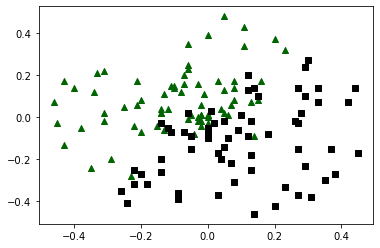

In [11]:
train = pd.read_csv('train1.csv',header=0)
plt.scatter(train.X1[train.Y== 0], train.X2[train.Y== 0],c='darkgreen',marker='^')
plt.scatter(train.X1[train.Y== 1], train.X2[train.Y== 1],c='black',marker=',')

In [13]:
SVM = SVC(kernel = 'linear',C=0.5)
X_train = train.loc[:,train.columns !='Y']
Y_train = train.Y
SVM.fit(X_train,Y_train)
print(SVM.coef_)
print(SVM.intercept_)
print(SVM.decision_function(X_train))

[[ 2.76712933 -3.03896142]]
[-0.20313183]
[ 0.37873132  1.29829681  1.6688969   0.29543954  0.04319149 -0.06749368
 -0.24118832  1.55869981 -1.20550101  0.91633534  0.73302149 -0.26614129
 -0.19177046 -1.30085243 -0.8971444  -0.88306471 -0.38052095 -1.12889994
  0.45777281  1.80948361 -0.90529936 -0.69034182  0.03998509 -0.45984034
 -1.90962088 -1.73543816  0.53806837  0.27125255 -0.71208839 -0.13691596
 -0.20313183 -0.53915973 -0.18410358  0.64185264  1.67705187  0.40243022
  0.36067924 -0.4408121  -0.23352144  1.27655024 -0.42993881  0.19960004
  0.2282475   0.06396189 -0.40721608  0.16056737  0.11853849  0.96031656
 -0.99793245  0.65913874 -0.96656667 -1.1026929  -0.03117934  0.28456625
 -0.06798177 -0.49936109 -1.04686223 -0.99967461 -0.78917754 -0.07070009
  0.51534563 -0.39780705 -0.11196298  0.99983731  0.10076432 -0.22487839
  1.62665784  0.49729355 -1.06812071 -1.72951343 -0.63674139  0.57710103
 -0.27701457 -0.93568897 -0.65130916  1.43616519 -0.37187791 -0.29478875
 -0.93199

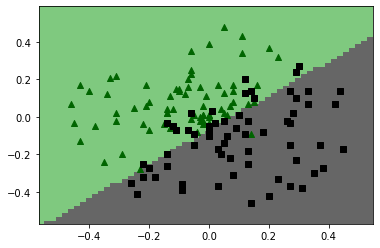

In [14]:
x_min, x_max = train.X1.min() - .1, train.X1.max() + .1
y_min, y_max = train.X2.min() - .1, train.X2.max() + .1
h = .02

xx,yy = np.meshgrid(np.arange(x_min,x_max,h), np.arange(y_min,y_max,h))
Z = SVM.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()
plt.pcolormesh(xx,yy,Z,cmap = plt.cm.Accent,shading='auto')

plt.scatter(train.X1[train.Y== 0], train.X2[train.Y== 0],c='darkgreen',marker='^')
plt.scatter(train.X1[train.Y== 1], train.X2[train.Y== 1],c='black',marker=',')

In [17]:
pred = SVM.predict(X_train)
print(pred)
accuracy = accuracy_score(
            y_true = Y_train,
            y_pred = pred,
            normalize=True
            )
print("La precision es:"+ str((100*accuracy))+"%")

[1 1 1 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 1 1
 0 0 1 0 1 1 1 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1
 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0]
La precision es:85.92592592592592%


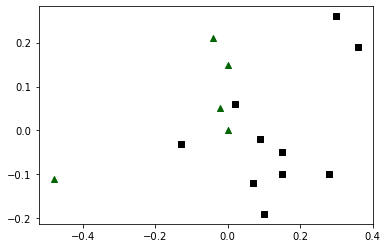

In [18]:
test = pd.read_csv('test1.csv',header=0)
plt.scatter(test.X1[test.Y== 0], test.X2[test.Y== 0],c='darkgreen',marker='^')
plt.scatter(test.X1[test.Y== 1], test.X2[test.Y== 1],c='black',marker=',')

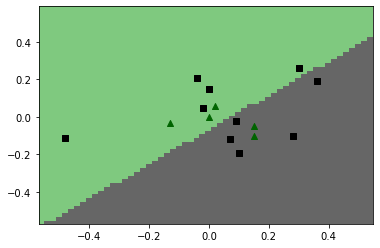

In [19]:
x_min, x_max = train.X1.min() - .1, train.X1.max() + .1
y_min, y_max = train.X2.min() - .1, train.X2.max() + .1
h = .02

xx,yy = np.meshgrid(np.arange(x_min,x_max,h), np.arange(y_min,y_max,h))
Z = SVM.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()
plt.pcolormesh(xx,yy,Z,cmap = plt.cm.Accent,shading='auto')

plt.scatter(test.X1[train.Y== 0], test.X2[train.Y== 0],c='darkgreen',marker='^')
plt.scatter(test.X1[train.Y== 1], test.X2[train.Y== 1],c='black',marker=',')

In [21]:
X_test = test.loc[:,test.columns  !='Y']
Y_test = test.Y
pred = SVM.predict(X_test)
print(pred)
accuracy = accuracy_score(
            y_true = Y_test,
            y_pred = pred,
            normalize=True
            )
print("La precision es:"+ str((100*accuracy))+"%")

[1 1 0 0 0 0 0 1 0 1 1 0 0 1 1]
La precision es:80.0%
